In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [2]:
from sklearn.svm import SVC

In [3]:
from ae_feature_extractor import autoencoder
ae = autoencoder ()

## Chest and Wrist Physio modalities classification

In [4]:
# use chest and wrist features for classification
scores_all = []
cms = []
for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = SVC(C = 0.8, gamma= 'auto', kernel='poly', degree=3)
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_all.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.8024516737388024
f1 score:  0.8046686636081591

subject  3
accuracy:  0.8347260909935005
f1 score:  0.8341859378109693

subject  4
accuracy:  0.8277136258660508
f1 score:  0.7544959727830539

subject  5
accuracy:  0.9769959404600812
f1 score:  0.9767186466429938

subject  6
accuracy:  0.9323342415985467
f1 score:  0.9331871306899449

subject  7
accuracy:  0.8298453139217471
f1 score:  0.7567567388322806

subject  8
accuracy:  0.6947463768115942
f1 score:  0.653215853094026

subject  9
accuracy:  0.9654073736913974
f1 score:  0.9650158478414207

subject  10
accuracy:  0.8247694334650857
f1 score:  0.7598583144213344

subject  11
accuracy:  0.8509205208801077
f1 score:  0.8408688338193204

subject  13
accuracy:  0.8468104222821204
f1 score:  0.7959813560734953

subject  14
accuracy:  0.7444993264481365
f1 score:  0.7349006103129306

subject  15
accuracy:  0.8289296909986565
f1 score:  0.7592672795864228

subject  16
accuracy:  0.9891940567312022
f1 score:  0.98918

In [5]:
np.array(scores_all)[:,1].mean() #accuracy

0.8381285045117421

In [6]:
np.array(scores_all)[:,1].std()

0.09829469311848264

In [7]:
np.array(scores_all)[:,2].mean() #f1-score

0.8109753436857186

In [8]:
np.array(scores_all)[:,2].std()

0.11062321909321814

### Confusion Matrices per subject and for all subjects combined

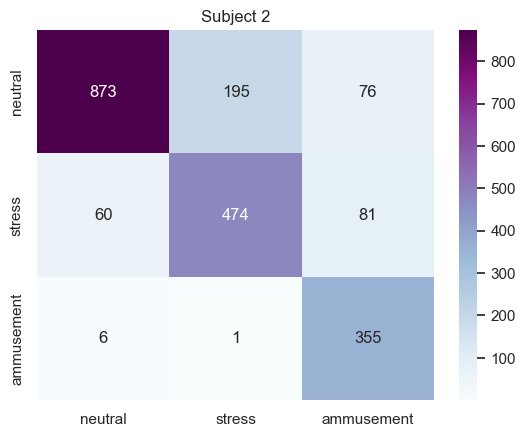

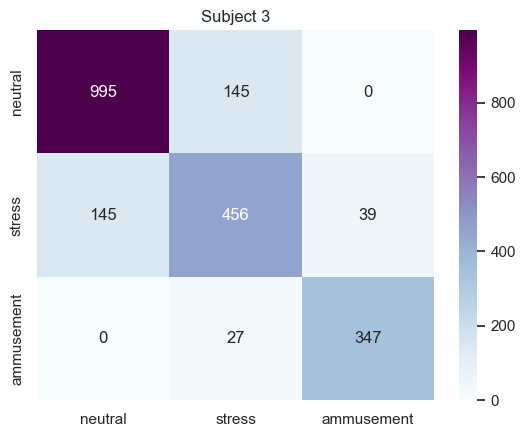

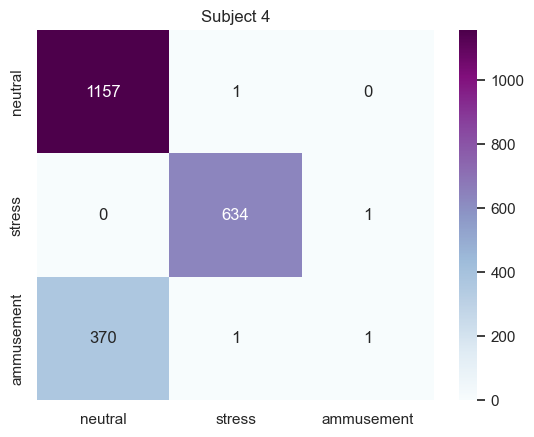

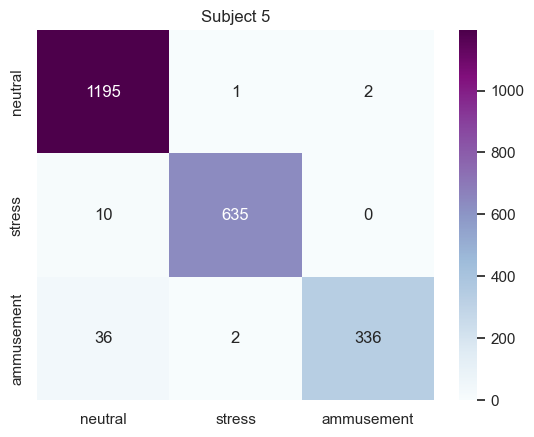

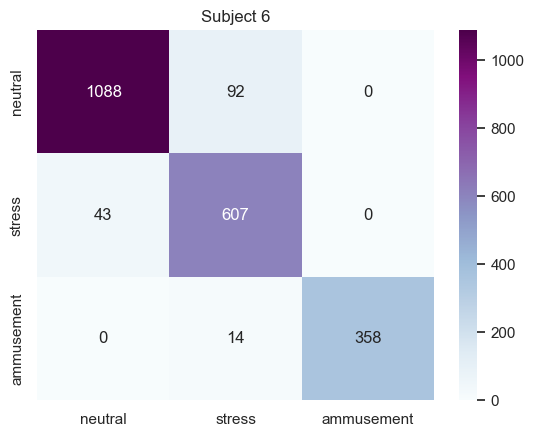

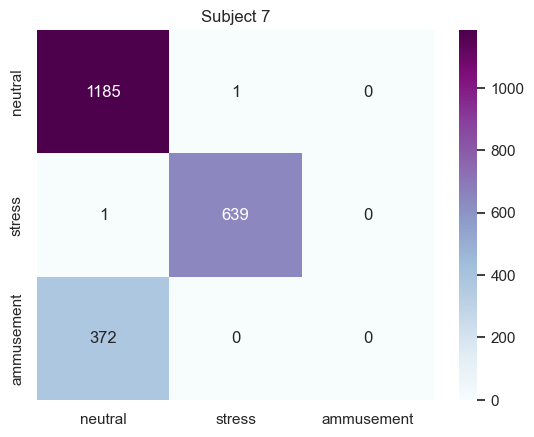

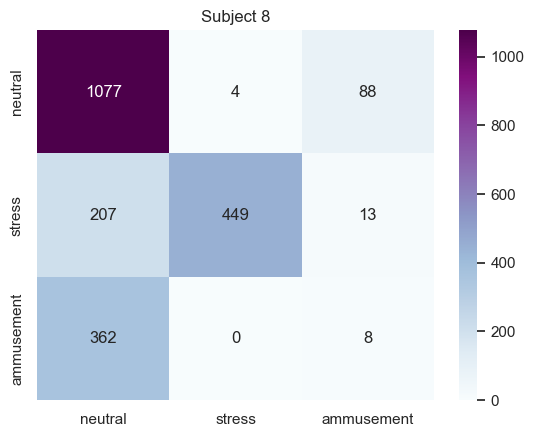

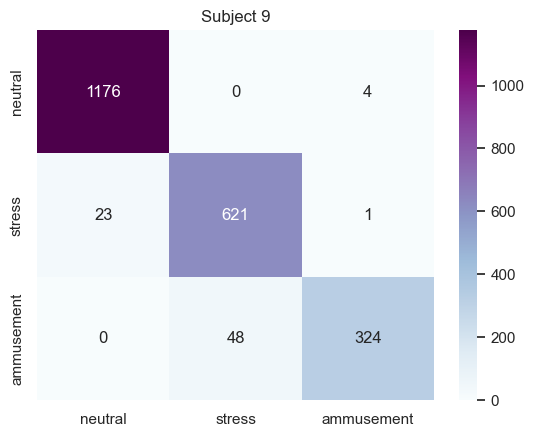

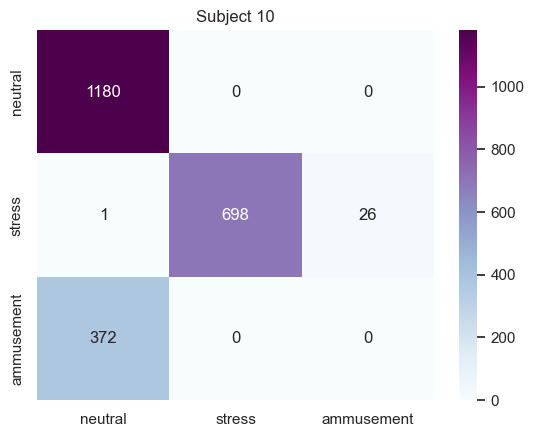

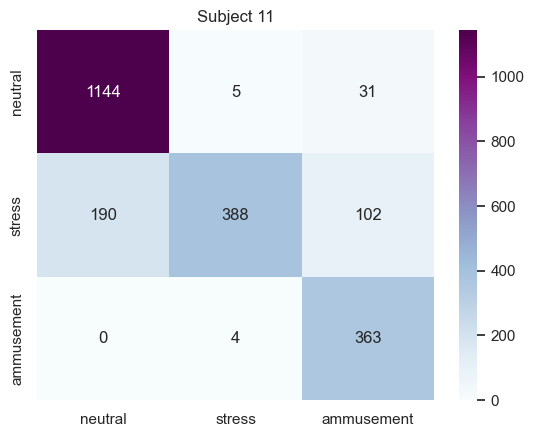

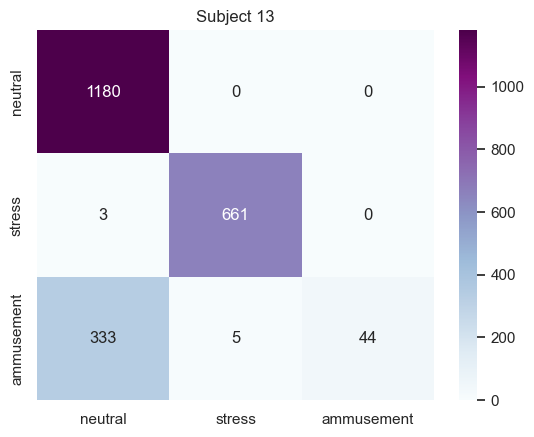

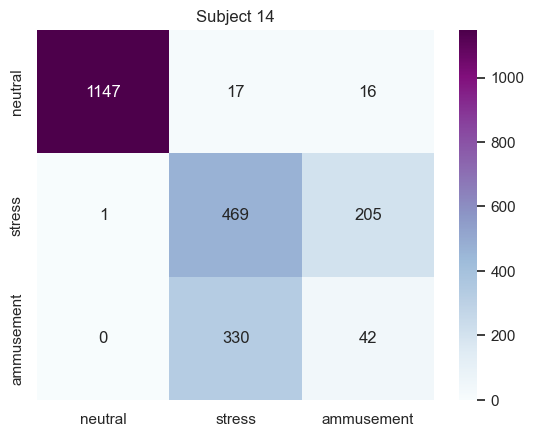

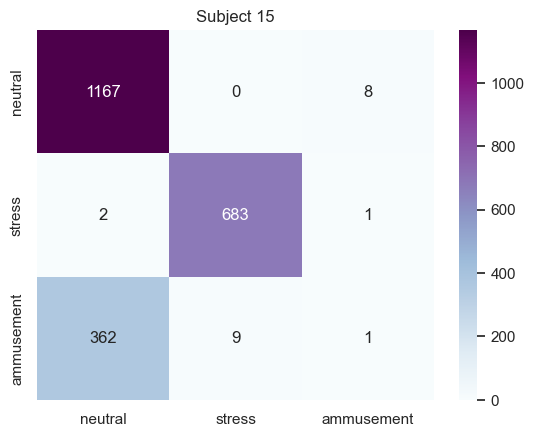

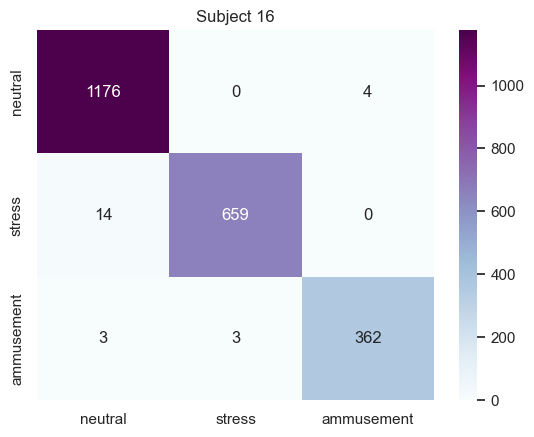

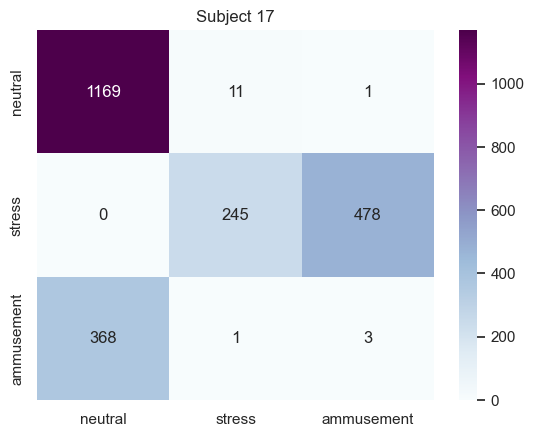

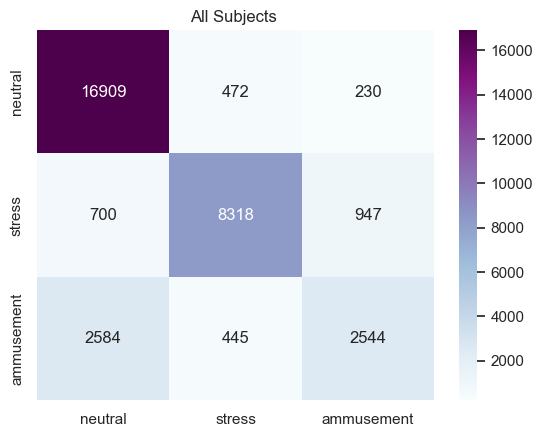

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_all)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()


## Chest only physio modalities classification

In [10]:
# use chest only features for classification
scores_c = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:80]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:80]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = SVC(C = 0.8, gamma= 'auto', kernel='poly', degree=3)
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_c.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.6831683168316832
f1 score:  0.6809512355446169

subject  3
accuracy:  0.7539461467038069
f1 score:  0.7489845357103337

subject  4
accuracy:  0.8138568129330254
f1 score:  0.7481503407806676

subject  5
accuracy:  0.9314388813712223
f1 score:  0.9296365438179954

subject  6
accuracy:  0.8487738419618529
f1 score:  0.8454144324774938

subject  7
accuracy:  0.8230209281164695
f1 score:  0.753685774934319

subject  8
accuracy:  0.5203804347826086
f1 score:  0.513211133474027

subject  9
accuracy:  0.810195721438325
f1 score:  0.7761249155635997

subject  10
accuracy:  0.8050065876152833
f1 score:  0.7497559081963102

subject  11
accuracy:  0.9434216434665469
f1 score:  0.9442883762425429

subject  13
accuracy:  0.8548966756513926
f1 score:  0.812781764569177

subject  14
accuracy:  0.7682981589582398
f1 score:  0.7617417168748297

subject  15
accuracy:  0.8311688311688312
f1 score:  0.7577520269104183

subject  16
accuracy:  0.9842413327330032
f1 score:  0.98412522

In [11]:
np.array(scores_c)[:,1].mean() #accuracy

0.8137155646764701

In [12]:
np.array(scores_c)[:,1].std()

0.1071750293716049

In [13]:
np.array(scores_c)[:,2].mean() #f1-score

0.7848332894739366

In [14]:
np.array(scores_c)[:,2].std()

0.11004996051135113

### Confusion Matrices per subject and for all subjects combined

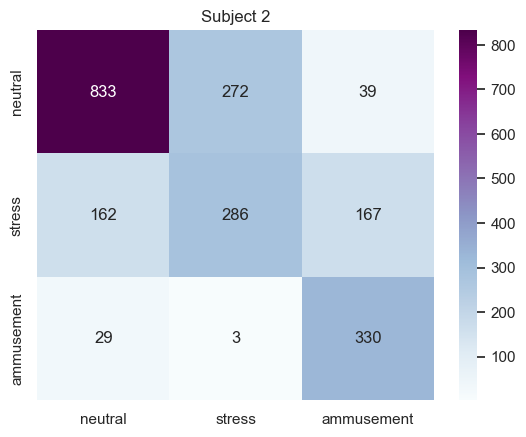

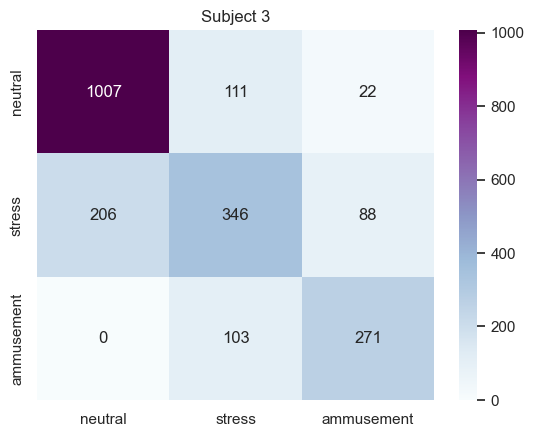

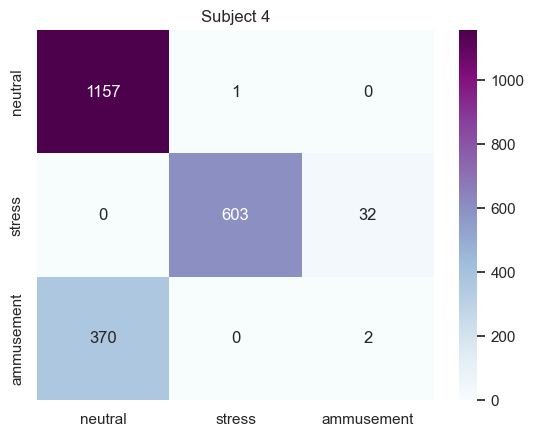

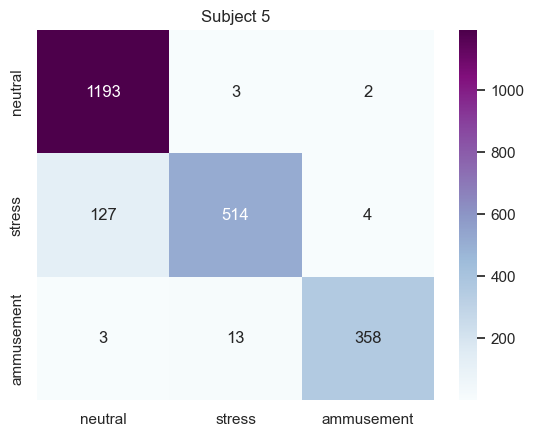

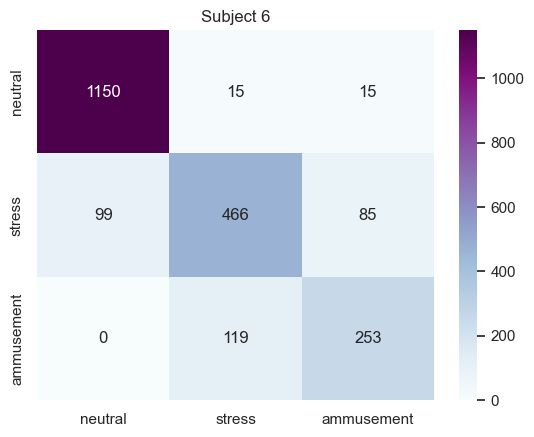

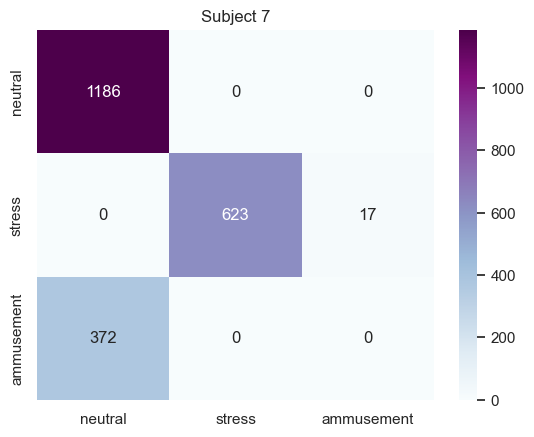

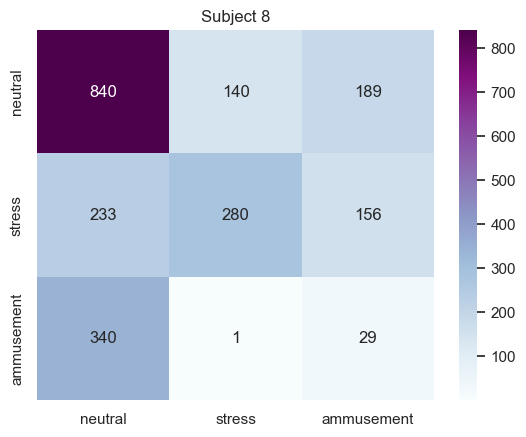

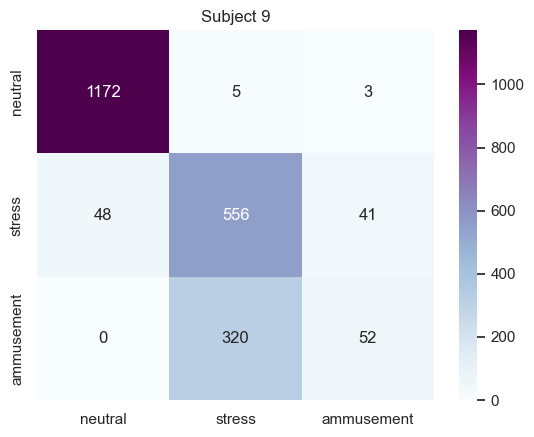

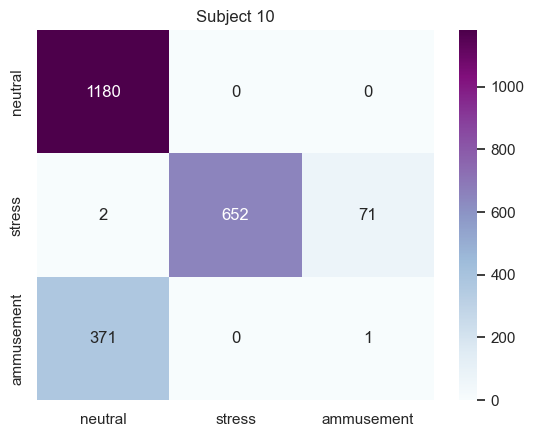

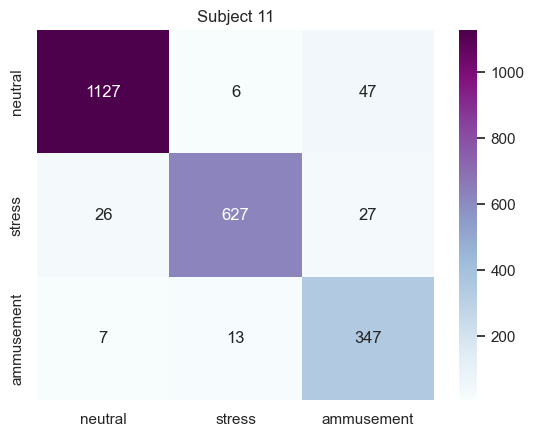

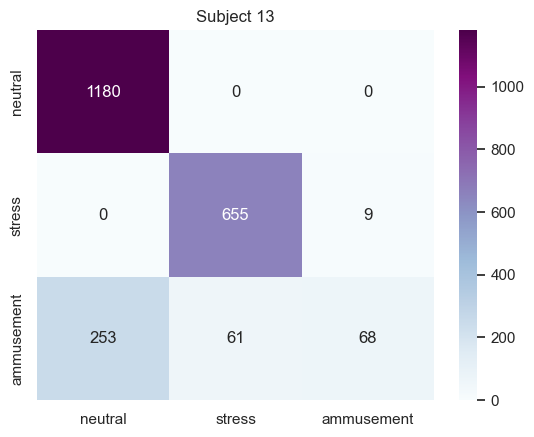

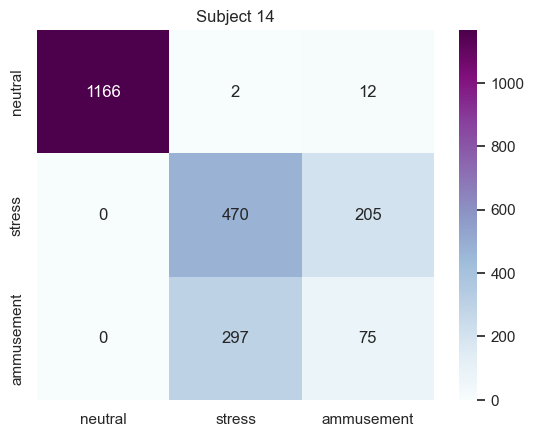

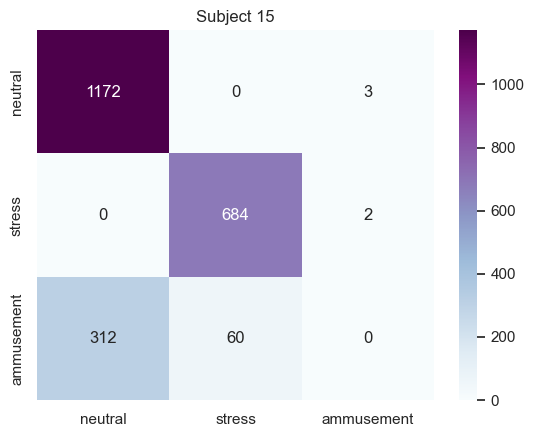

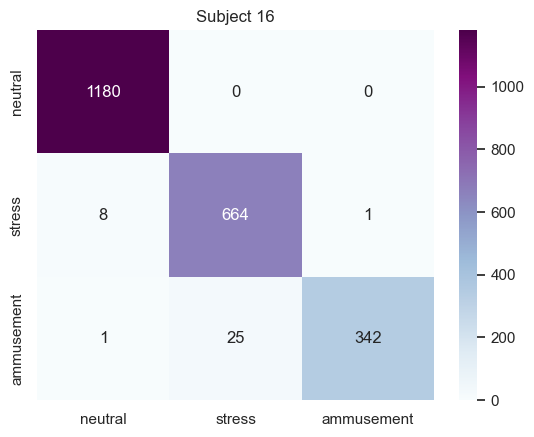

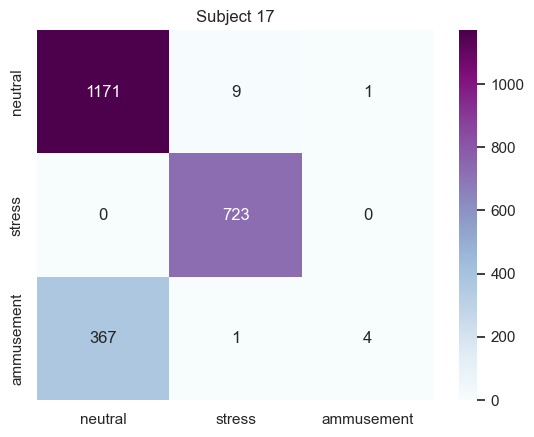

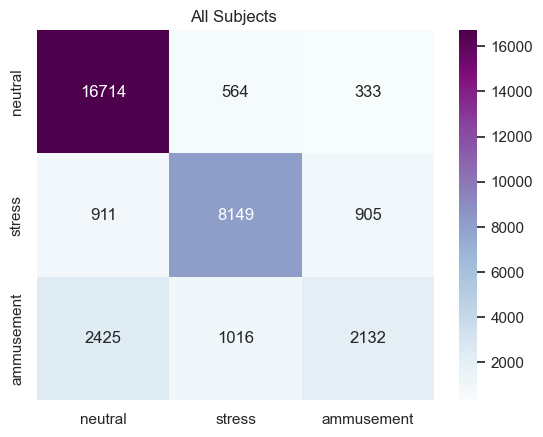

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_c)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Wrist only physio modalities classification

In [16]:
# use wrist only features for classification
scores_w = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,80:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,80:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = SVC()
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_w.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.8462989156058462
f1 score:  0.8345235106380958

subject  3
accuracy:  0.7000928505106778
f1 score:  0.697796220969123

subject  4
accuracy:  0.8230946882217091
f1 score:  0.7493277796106894

subject  5
accuracy:  0.7478574650428507
f1 score:  0.722141140066438

subject  6
accuracy:  0.8437783832879201
f1 score:  0.8462564468308726

subject  7
accuracy:  0.781164695177434
f1 score:  0.7165438431361678

subject  8
accuracy:  0.813858695652174
f1 score:  0.7457692032737574

subject  9
accuracy:  0.9817933545744196
f1 score:  0.981703544689313

subject  10
accuracy:  0.6416337285902504
f1 score:  0.6438901340839256

subject  11
accuracy:  0.7364167040862146
f1 score:  0.7162818533630076

subject  13
accuracy:  0.8180592991913747
f1 score:  0.7450195101039458

subject  14
accuracy:  0.6511001347103726
f1 score:  0.6041139101224847

subject  15
accuracy:  0.5987460815047022
f1 score:  0.6101590577279749

subject  16
accuracy:  0.6587122917604683
f1 score:  0.656041526

In [17]:
np.array(scores_w)[:,1].mean() #accuracy

0.7348147096455112

In [18]:
np.array(scores_w)[:,1].std()

0.13563748594311184

In [19]:
np.array(scores_w)[:,1].mean() #f1-score

0.7348147096455112

In [20]:
np.array(scores_w)[:,1].std()

0.13563748594311184

### Confusion Matrices per subject and for all subjects combined

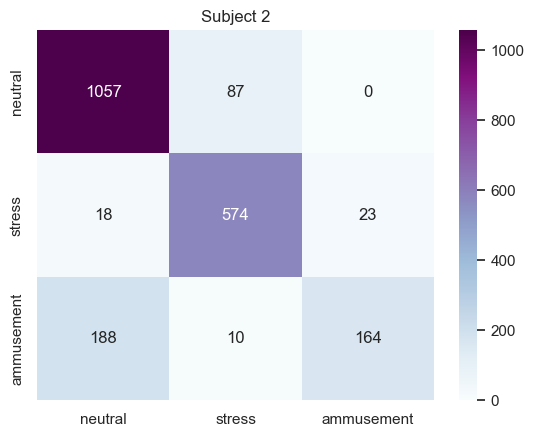

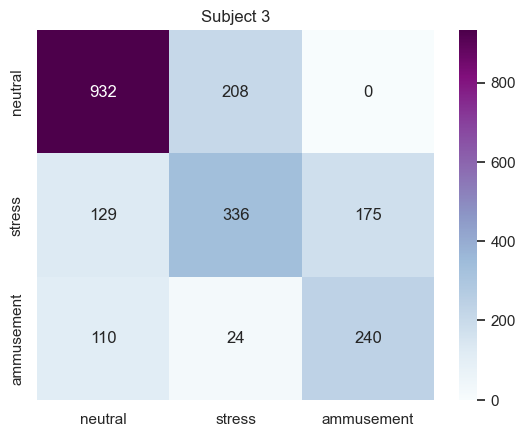

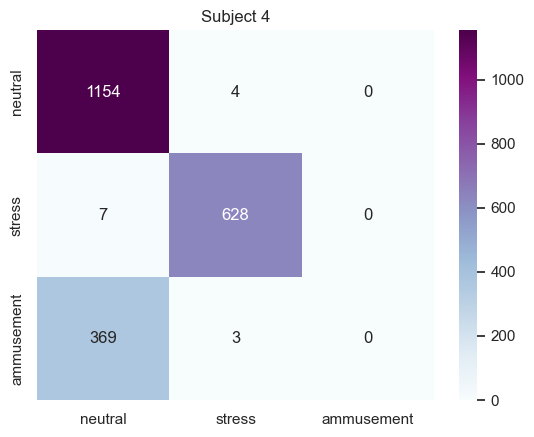

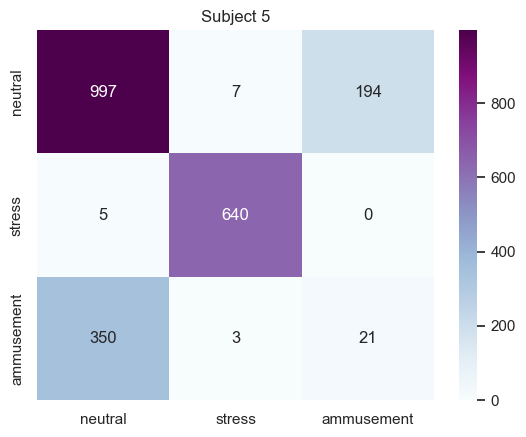

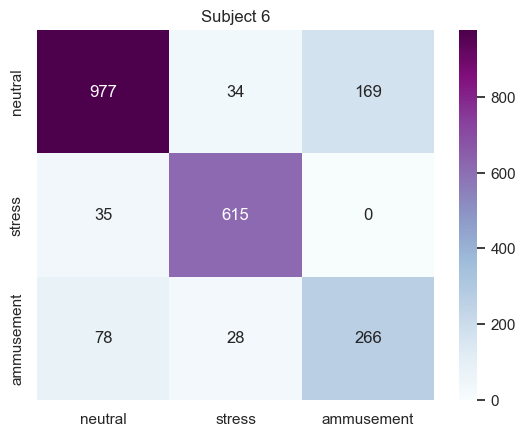

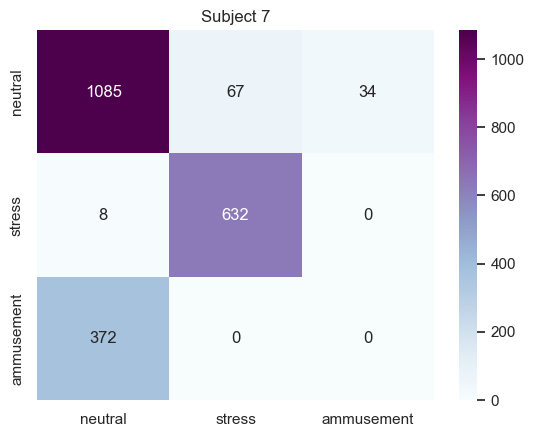

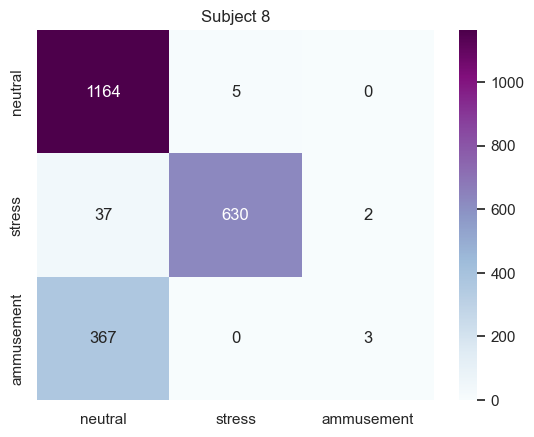

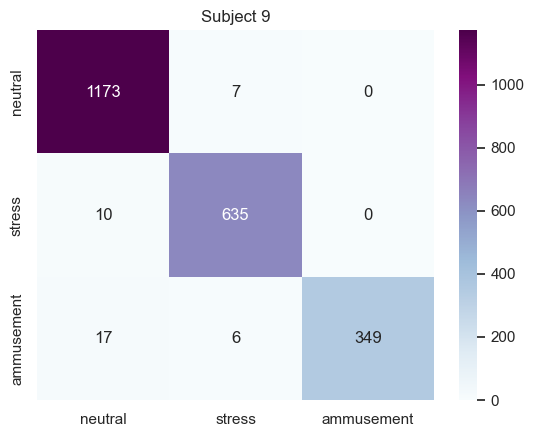

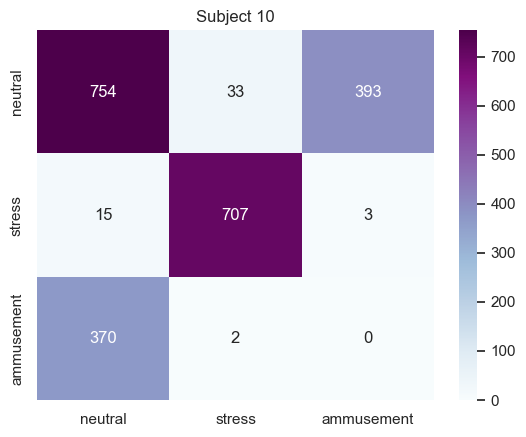

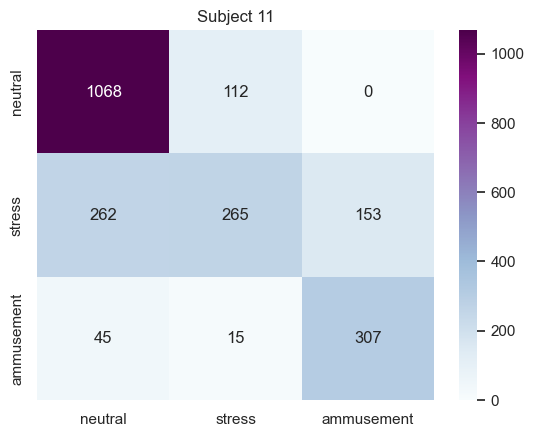

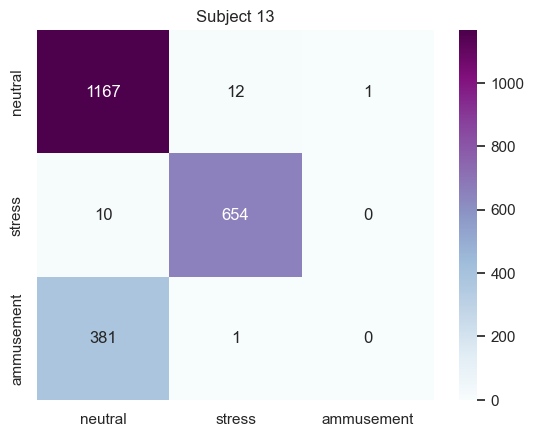

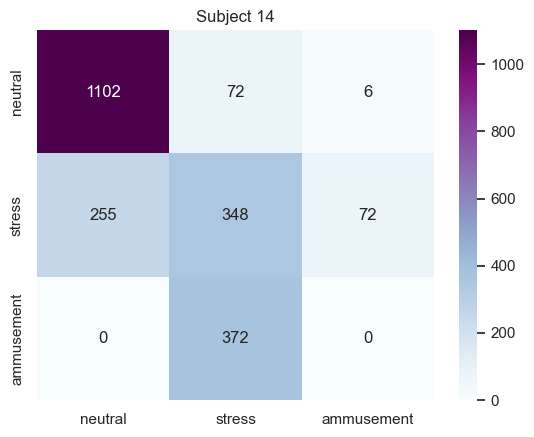

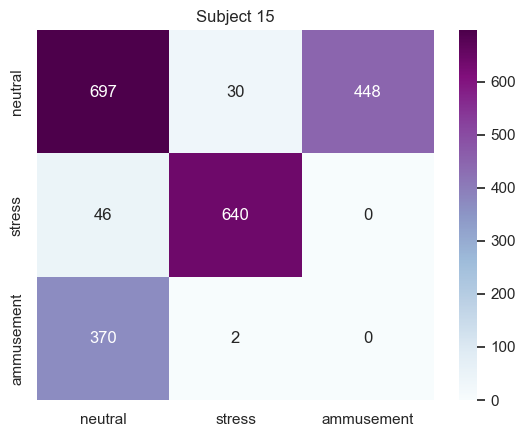

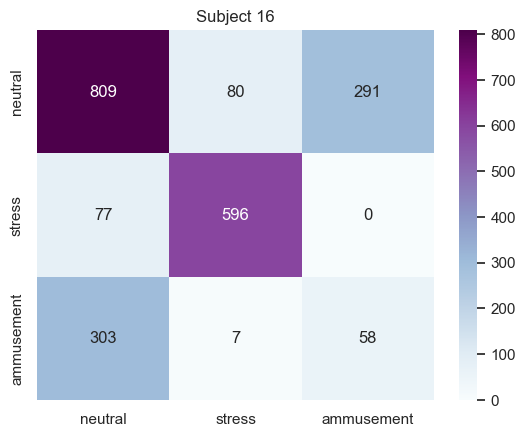

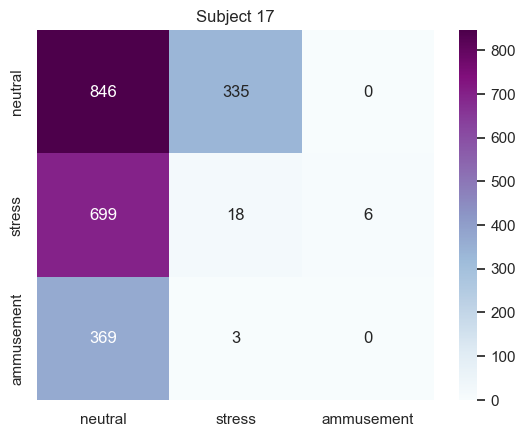

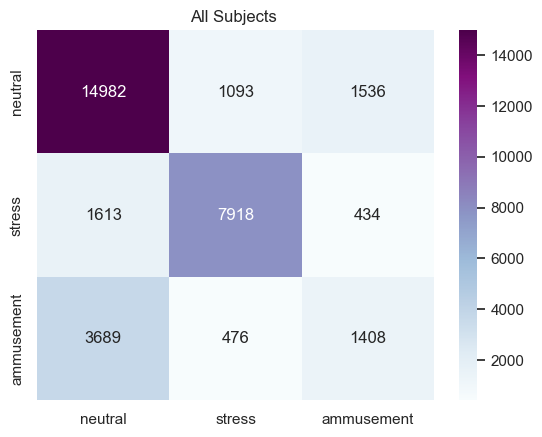

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_w)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Accuracies plot

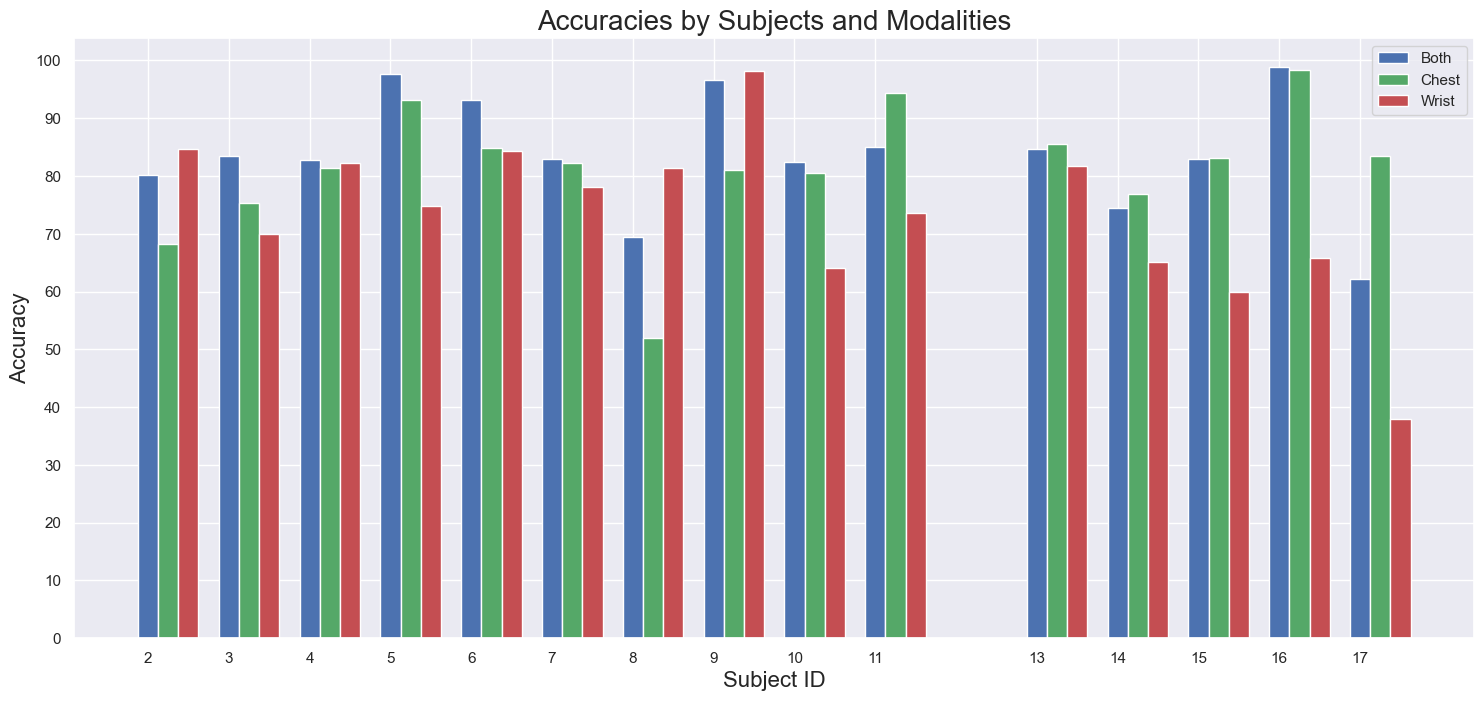

In [22]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("Accuracies by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,1]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,1]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,1]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])


## F1-score plot

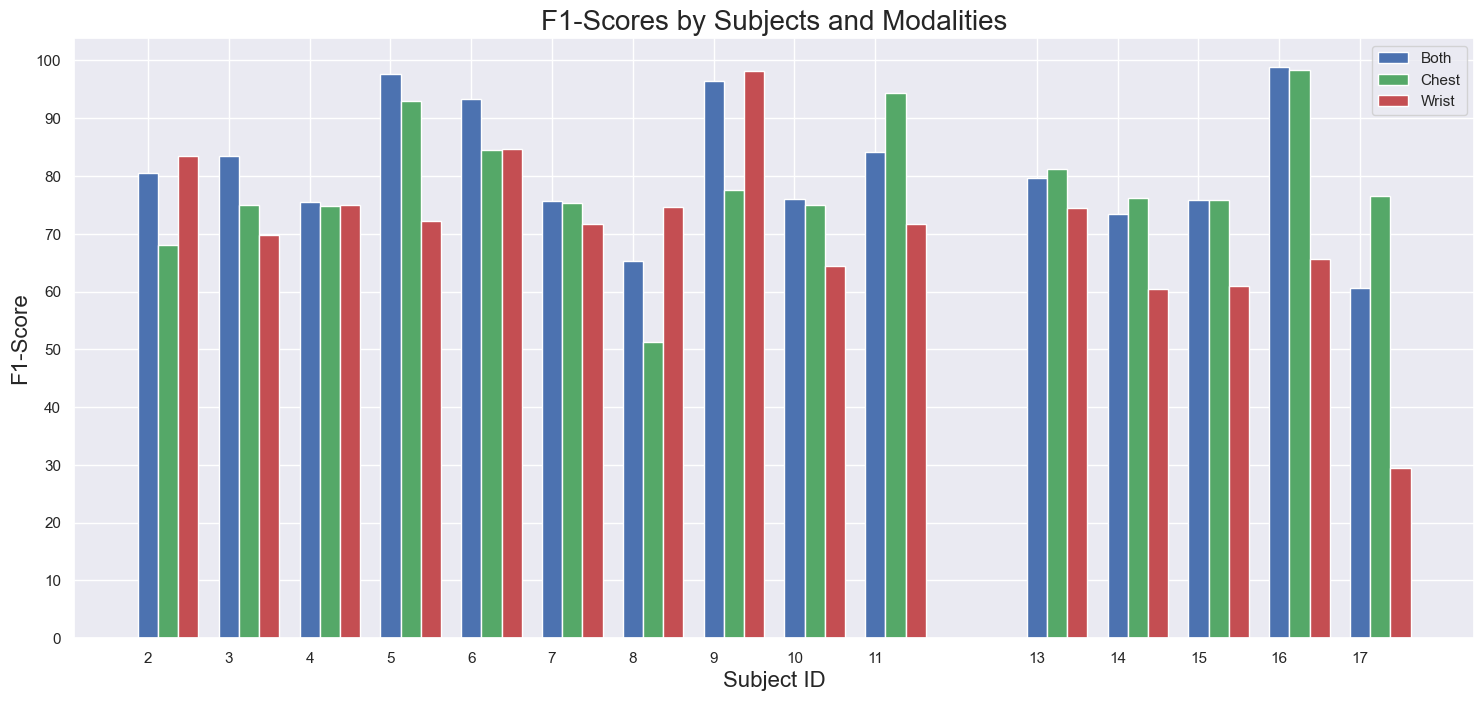

In [23]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('F1-Score', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("F1-Scores by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,2]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,2]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,2]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])